<a href="https://colab.research.google.com/github/GGrinspun/Time_series_1_Avd/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from scipy import stats
from statistics import variance
from google.colab import drive
import statsmodels.api as sm
import sklearn
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#1. EDA

#Coca Cola Stock price - Time Series

In [ ]:
coca = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Coca.csv')

In [ ]:
coca.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200


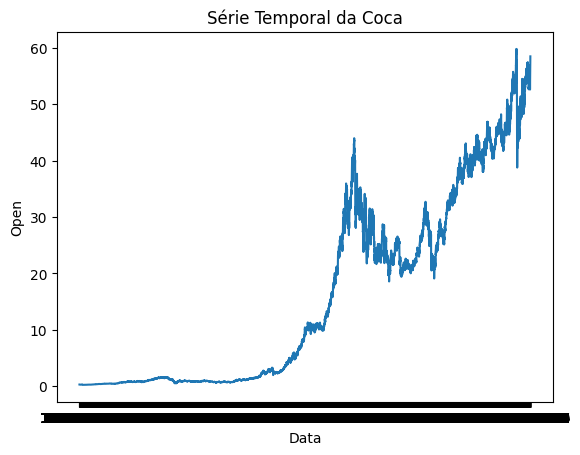

In [ ]:
plt.plot(coca['Date'], coca['Open'])
plt.xlabel('Data')
plt.ylabel('Open')
plt.title('Série Temporal da Coca')
plt.show()

In [ ]:
coca.sort_values(by='Date', ascending=True, inplace=True)


coca['Date'] = pd.to_datetime(coca['Date'])
coca.set_index('Date', inplace= True)

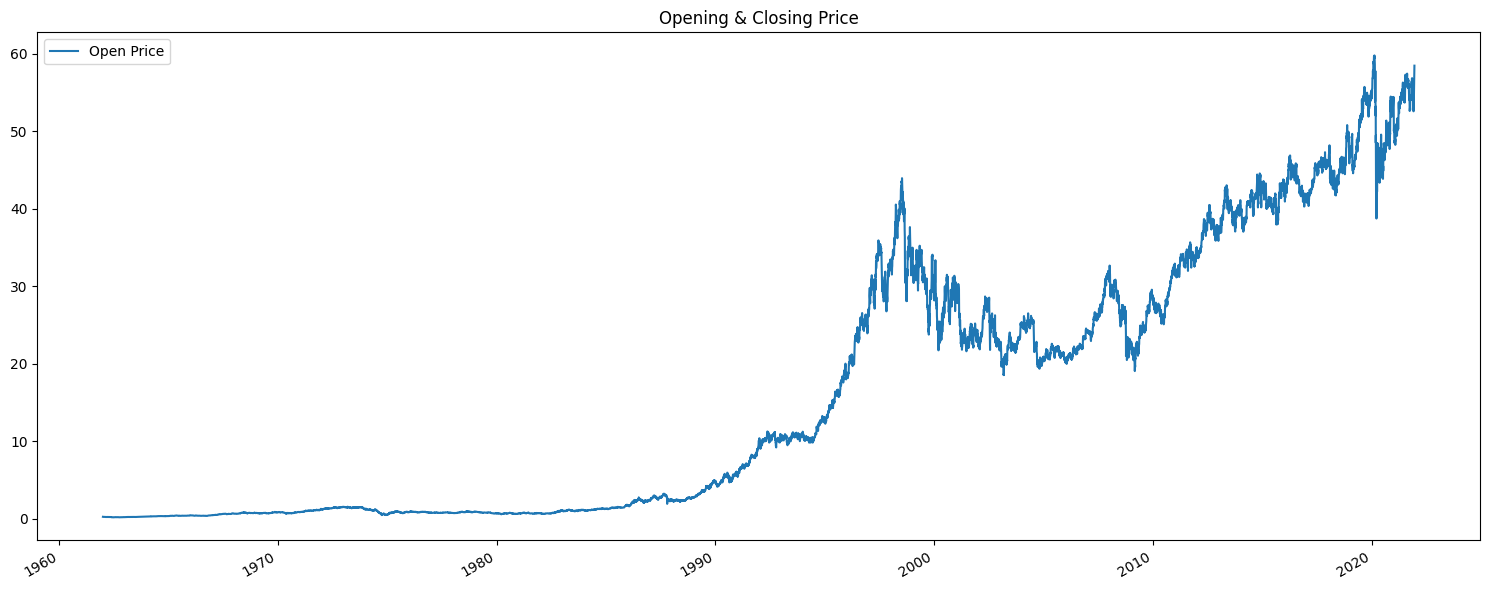

In [ ]:
plt.figure(figsize=(15, 6))
coca['Open'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Opening & Closing Price")
plt.legend(['Open Price'])
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Carregue o DataFrame e converta a coluna de datas, se necessário
# df = ...

# Execute o Teste de Dickey-Fuller Aumentado
resultado_adf = adfuller(coca['Open'])

# Imprima os resultados
print('Estatística ADF:', resultado_adf[0])
print('Valor p:', resultado_adf[1])
print('Valores Críticos:', resultado_adf[4])

# Verifique a significância do resultado p
if resultado_adf[1] <= 0.05:
    print("Rejeitar a hipótese nula. A série é estacionária.")
else:
    print("Não rejeitar a hipótese nula. A série não é estacionária.")

Estatística ADF: 0.599869772420659
Valor p: 0.9876124188400972
Valores Críticos: {'1%': -3.4307845213626917, '5%': -2.8617320396936123, '10%': -2.5668722180852854}
Não rejeitar a hipótese nula. A série não é estacionária.


In [ ]:
#criar novo data set a partir de 2010

import pandas as pd

# Suponha que df seja o seu DataFrame com datas no índice
# e uma coluna 'valor'

# Certifique-se de que o índice seja do tipo datetime
coca.index = pd.to_datetime(coca.index)

# Filtre os dados para incluir apenas aqueles a partir de 2010
coca_2010 = coca[coca.index.year >= 2010].copy()

# Exiba o novo conjunto de dados
coca_2010.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,28.580000,28.610001,28.450001,28.520000,19.646149,13870400
2010-01-05,28.424999,28.495001,28.070000,28.174999,19.408504,23172400
2010-01-06,28.174999,28.219999,27.990000,28.165001,19.401609,19264600
2010-01-07,28.165001,28.184999,27.875000,28.094999,19.353390,13234600
2010-01-08,27.730000,27.820000,27.375000,27.575001,18.995188,28712400


In [ ]:
colunas_para_dropar = ['High', 'Low', 'Close', 'Adj Close', 'Open']

Volume_2010 = coca_2010.drop(columns=colunas_para_dropar)

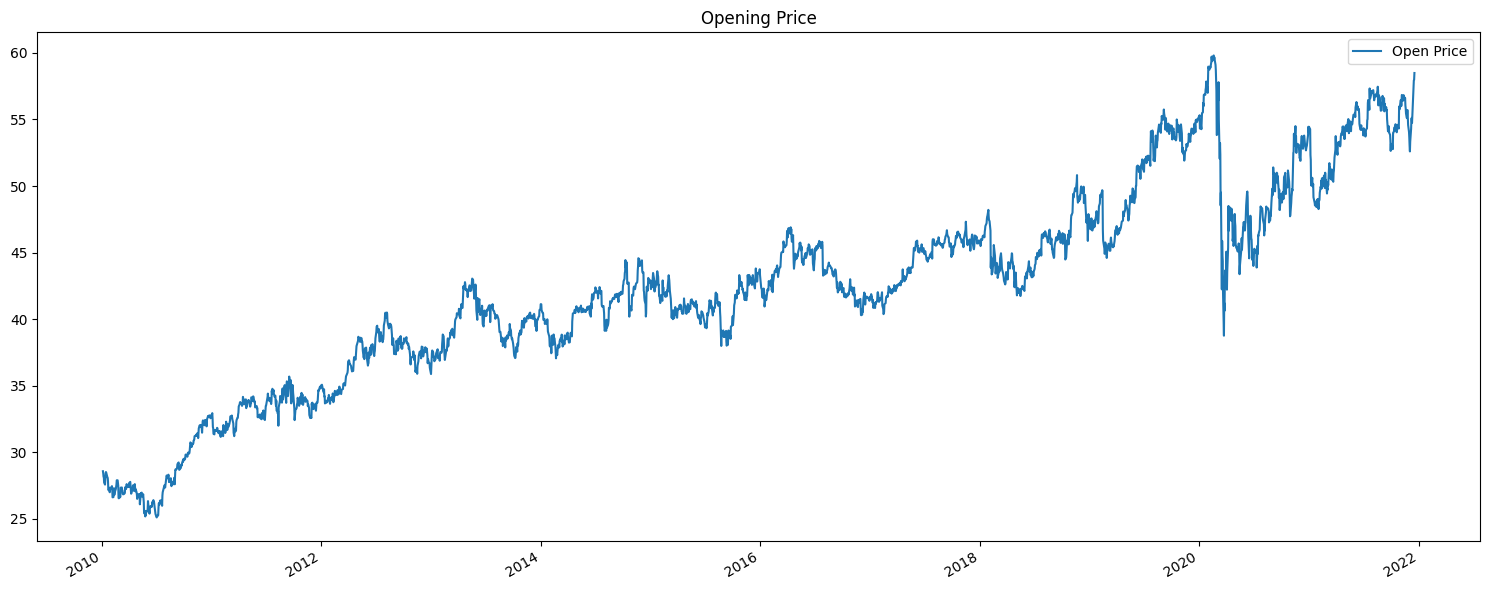

In [ ]:
plt.figure(figsize=(15, 6))
coca_2010['Open'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Opening Price")
plt.legend(['Open Price'])
plt.tight_layout()
plt.show()

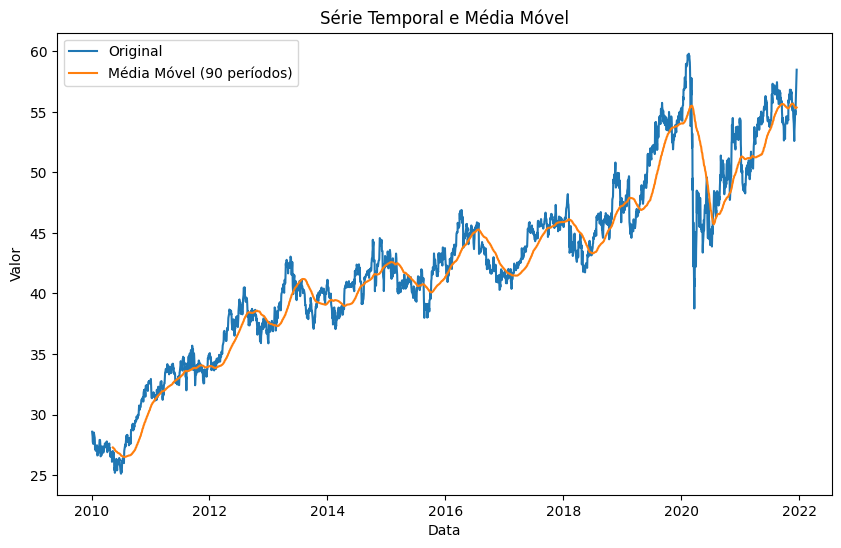

Estatística ADF: -1.788686985061106
Valor p: 0.38609257983216916
Valores Críticos: {'1%': -3.432606151575025, '5%': -2.8625368163579603, '10%': -2.567300633673491}
Não rejeitar a hipótese nula. A série suavizada não é estacionária.


In [ ]:

# Suponha que df seja o seu DataFrame com a coluna 'valor' e o índice contendo as datas
# Certifique-se de que o índice seja do tipo datetime
# df.index = pd.to_datetime(df.index)

# Defina o tamanho da janela da média móvel
janela_media_movel = 90

# Calcule a média móvel
coca_2010['valor_media_movel'] = coca_2010['Open'].rolling(window=janela_media_movel).mean()

# Exiba a série temporal original e a média móvel
plt.figure(figsize=(10, 6))
plt.plot(coca_2010['Open'], label='Original')
plt.plot(coca_2010['valor_media_movel'], label=f'Média Móvel ({janela_media_movel} períodos)')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Série Temporal e Média Móvel')
plt.legend()
plt.show()

# Execute o Teste de Dickey-Fuller Aumentado após a suavização
resultado_adf_media_movel = adfuller(coca_2010['valor_media_movel'].dropna())

# Imprima os resultados
print('Estatística ADF:', resultado_adf_media_movel[0])
print('Valor p:', resultado_adf_media_movel[1])
print('Valores Críticos:', resultado_adf_media_movel[4])

# Verifique a significância do resultado p
if resultado_adf_media_movel[1] <= 0.05:
    print("Rejeitar a hipótese nula. A série suavizada é estacionária.")
else:
    print("Não rejeitar a hipótese nula. A série suavizada não é estacionária.")

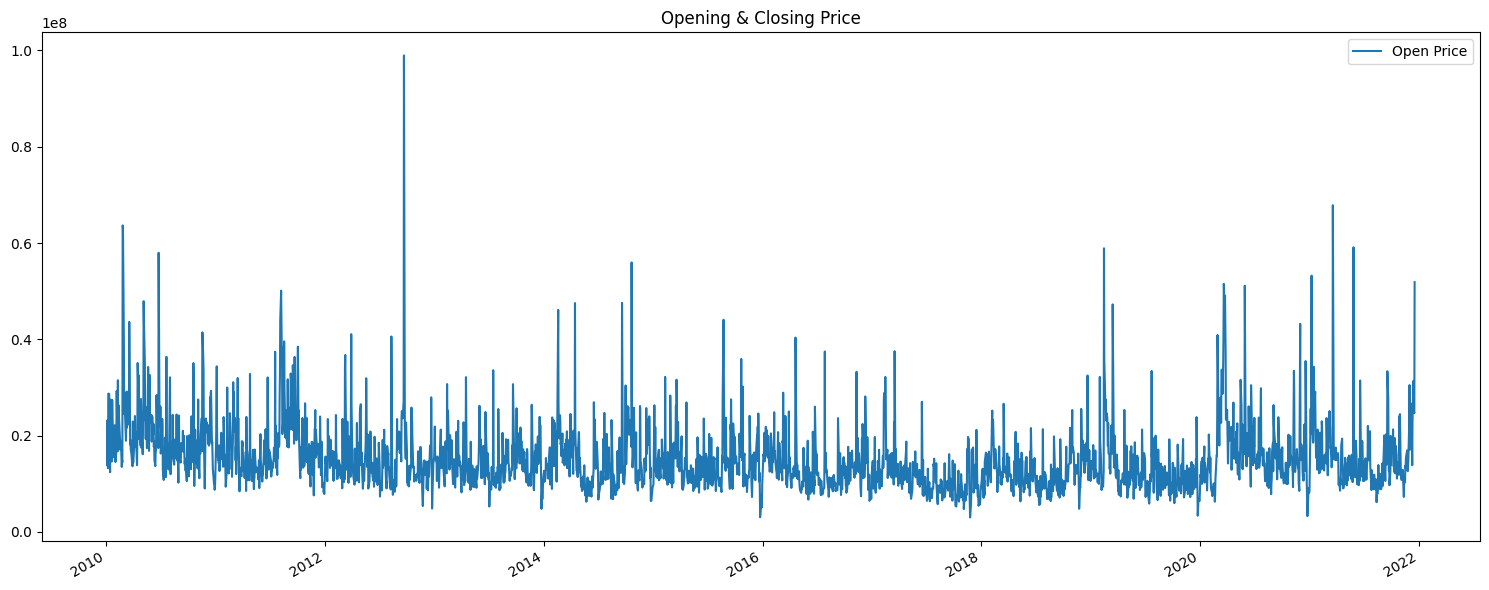

In [ ]:
plt.figure(figsize=(15, 6))
coca_2010['Volume'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Opening & Closing Price")
plt.legend(['Open Price'])
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Carregue o DataFrame e converta a coluna de datas, se necessário
# df = ...

# Execute o Teste de Dickey-Fuller Aumentado
resultado_adf = adfuller(coca_2010['Volume'])

# Imprima os resultados
print('Estatística ADF:', resultado_adf[0])
print('Valor p:', resultado_adf[1])
print('Valores Críticos:', resultado_adf[4])

# Verifique a significância do resultado p
if resultado_adf[1] <= 0.05:
    print("Rejeitar a hipótese nula. A série é estacionária.")
else:
    print("Não rejeitar a hipótese nula. A série não é estacionária.")

Estatística ADF: -7.683601492861473
Valor p: 1.4815663377148087e-11
Valores Críticos: {'1%': -3.4325338204130245, '5%': -2.862504870605232, '10%': -2.5672836260495844}
Rejeitar a hipótese nula. A série é estacionária.


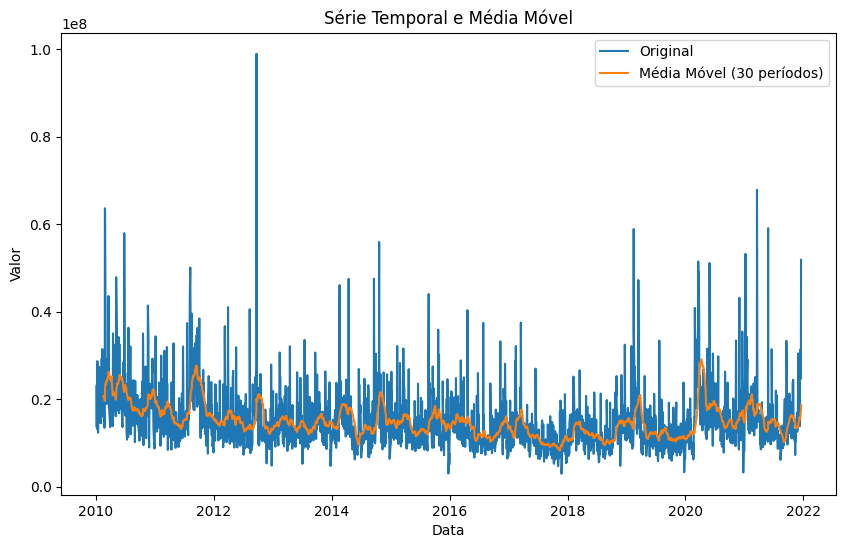

Estatística ADF: -4.328123316260436
Valor p: 0.00039695191407231734
Valores Críticos: {'1%': -3.432566387909864, '5%': -2.862519254448958, '10%': -2.567291283859137}
Rejeitar a hipótese nula. A série suavizada é estacionária.


In [ ]:
# Suponha que df seja o seu DataFrame com a coluna 'valor' e o índice contendo as datas
# Certifique-se de que o índice seja do tipo datetime
# df.index = pd.to_datetime(df.index)

# Defina o tamanho da janela da média móvel
janela_media_movel = 30

# Calcule a média móvel
coca_2010['valor_media_movel_volume'] = coca_2010['Volume'].rolling(window=janela_media_movel).mean()

# Exiba a série temporal original e a média móvel
plt.figure(figsize=(10, 6))
plt.plot(coca_2010['Volume'], label='Original')
plt.plot(coca_2010['valor_media_movel_volume'], label=f'Média Móvel ({janela_media_movel} períodos)')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Série Temporal e Média Móvel')
plt.legend()
plt.show()

# Execute o Teste de Dickey-Fuller Aumentado após a suavização
resultado_adf_media_movel = adfuller(coca_2010['valor_media_movel_volume'].dropna())

# Imprima os resultados
print('Estatística ADF:', resultado_adf_media_movel[0])
print('Valor p:', resultado_adf_media_movel[1])
print('Valores Críticos:', resultado_adf_media_movel[4])

# Verifique a significância do resultado p
if resultado_adf_media_movel[1] <= 0.05:
    print("Rejeitar a hipótese nula. A série suavizada é estacionária.")
else:
    print("Não rejeitar a hipótese nula. A série suavizada não é estacionária.")

<Figure size 5000x1200 with 0 Axes>

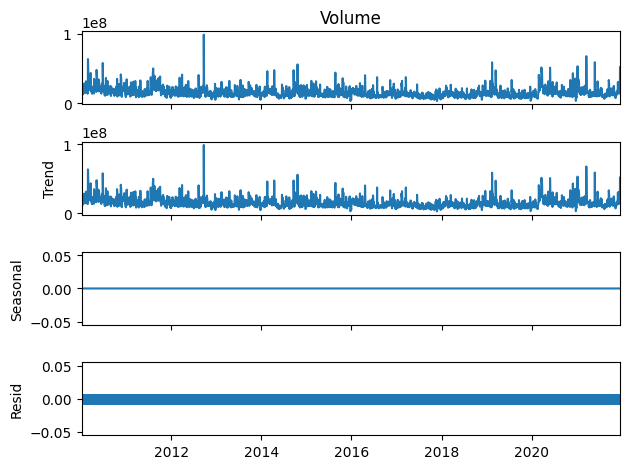

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(50, 12))

result = seasonal_decompose(Volume_2010['Volume'], model='additive', period=1)
result.plot()
plt.show()

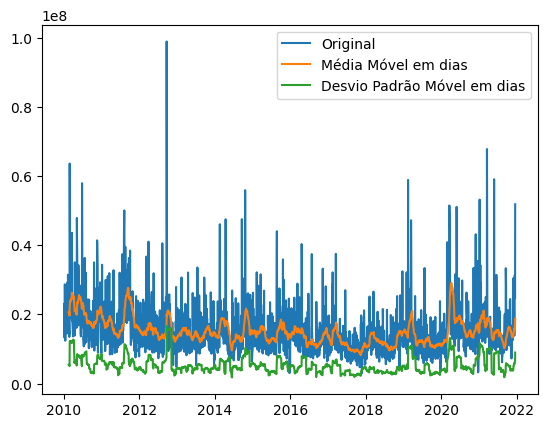

In [ ]:
rolling_mean = Volume_2010['Volume'].rolling(window=30).mean()
rolling_std = Volume_2010['Volume'].rolling(window=30).std()

plt.plot(Volume_2010.index, Volume_2010['Volume'], label='Original')
plt.plot(Volume_2010.index, rolling_mean, label='Média Móvel em dias')
plt.plot(Volume_2010.index, rolling_std, label='Desvio Padrão Móvel em dias')
plt.legend()
plt.show()

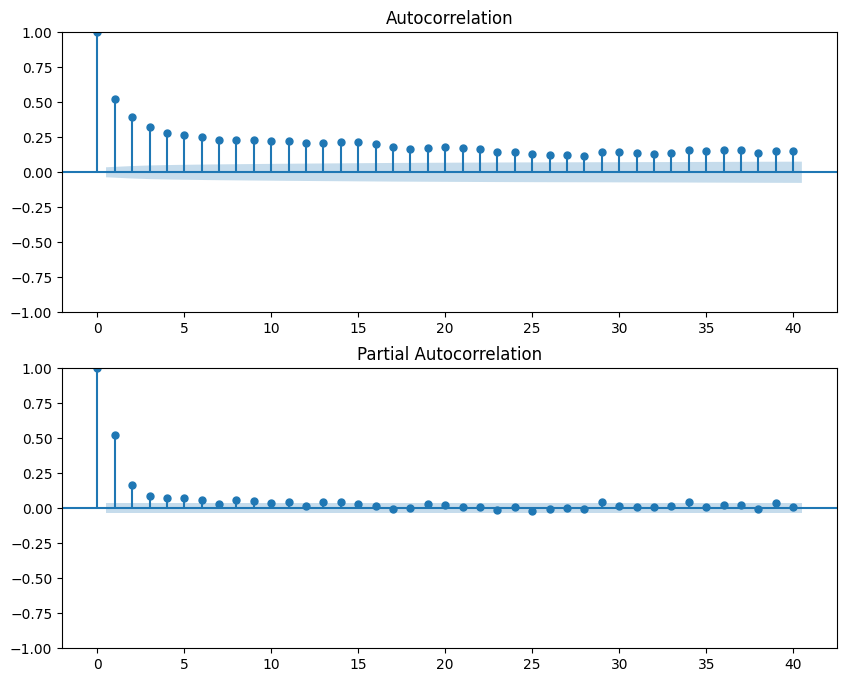

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plote a ACF e PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(Volume_2010['Volume'], lags=40, ax=ax1)
plot_pacf(Volume_2010['Volume'], lags=40, ax=ax2)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the po

Erro Médio Quadrático (MSE) - Modelo AR: 49833167297229.56


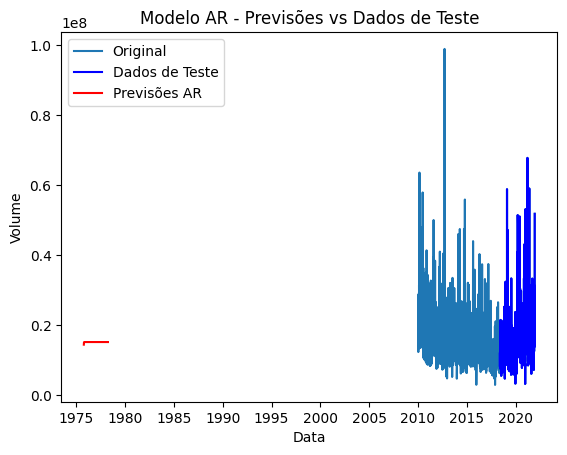

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Divida o conjunto de dados em treino e teste
percentual_treino = 0.7
tamanho_treino = int(len(Volume_2010) * percentual_treino)

dados_treino = Volume_2010['Volume'].iloc[:tamanho_treino]
dados_teste = Volume_2010['Volume'].iloc[tamanho_treino:]

# Ajuste o modelo AR
ordem_ar = 2  # Ajuste conforme necessário
modelo_ar = AutoReg(dados_treino, lags=ordem_ar)
ajuste_ar = modelo_ar.fit()

# Faça previsões nos dados de teste
previsoes_ar = ajuste_ar.predict(start=len(dados_treino), end=len(Volume_2010)-1, dynamic=False)

# Avalie a precisão do modelo (por exemplo, usando o erro médio quadrático)
mse_ar = mean_squared_error(dados_teste, previsoes_ar)
print(f"Erro Médio Quadrático (MSE) - Modelo AR: {mse_ar}")

# Plote as previsões
plt.plot(Volume_2010.index, Volume_2010['Volume'], label='Original')
plt.plot(dados_teste.index, dados_teste, label='Dados de Teste', color='blue')
plt.plot(previsoes_ar.index, previsoes_ar, label='Previsões AR', color='red')
plt.xlabel('Data')
plt.ylabel('Volume')
plt.title('Modelo AR - Previsões vs Dados de Teste')
plt.legend()
plt.show()

Estatística ADF: -5.147950341885863
Valor p: 1.1218673481208487e-05
Valores Críticos: {'1%': -3.432549243758671, '5%': -2.8625116825389747, '10%': -2.5672872526493307}
Rejeitar a hipótese nula. A série suavizada é estacionária.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

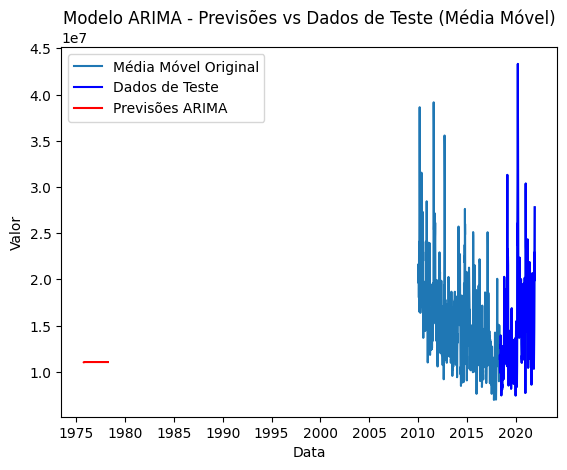

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

janela_media_movel = 7  # Ajuste conforme necessário

# Calcule a média móvel
Volume_2010['media_movel'] = Volume_2010['Volume'].rolling(window=janela_media_movel).mean()

# Execute o Teste de Dickey-Fuller Aumentado na série suavizada
resultado_adf_media_movel = adfuller(Volume_2010['media_movel'].dropna())

# Imprima os resultados do teste na série suavizada
print('Estatística ADF:', resultado_adf_media_movel[0])
print('Valor p:', resultado_adf_media_movel[1])
print('Valores Críticos:', resultado_adf_media_movel[4])

# Verifique a significância do resultado p na série suavizada
if resultado_adf_media_movel[1] <= 0.05:
    print("Rejeitar a hipótese nula. A série suavizada é estacionária.")
else:
    print("Não rejeitar a hipótese nula. A série suavizada não é estacionária.")

# Divida o conjunto de dados em treino e teste
percentual_treino = 0.7
tamanho_treino = int(len(Volume_2010) * percentual_treino)

dados_treino = Volume_2010['media_movel'].iloc[:tamanho_treino]
dados_teste = Volume_2010['media_movel'].iloc[tamanho_treino:]

# Ajuste o modelo ARIMA nos dados de treino
ordem_arima = (1, 1, 1)  # Ajuste conforme necessário
modelo_arima = ARIMA(dados_treino, order=ordem_arima)
ajuste_arima = modelo_arima.fit()

# Faça previsões nos dados de teste
previsoes_arima = ajuste_arima.predict(start=len(dados_treino), end=len(Volume_2010)-1, dynamic=False, typ='levels')

# Plote as previsões
plt.plot(Volume_2010.index, Volume_2010['media_movel'], label='Média Móvel Original')
plt.plot(dados_teste.index, dados_teste, label='Dados de Teste', color='blue')
plt.plot(previsoes_arima.index, previsoes_arima, label='Previsões ARIMA', color='red')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Modelo ARIMA - Previsões vs Dados de Teste (Média Móvel)')
plt.legend()
plt.show()

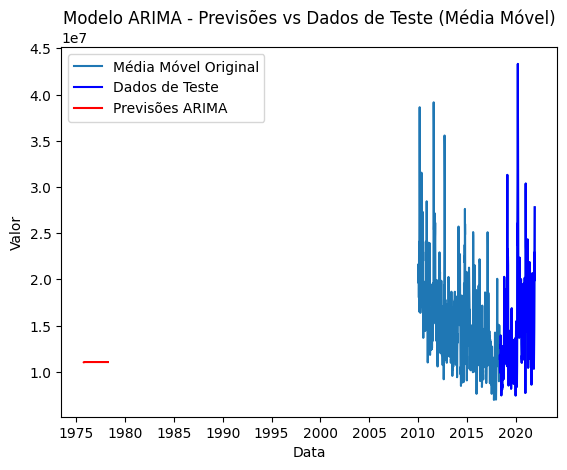

In [ ]:
plt.plot(Volume_2010.index, Volume_2010['media_movel'], label='Média Móvel Original')
plt.plot(dados_teste.index, dados_teste, label='Dados de Teste', color='blue')
plt.plot(previsoes_arima.index, previsoes_arima, label='Previsões ARIMA', color='red')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Modelo ARIMA - Previsões vs Dados de Teste (Média Móvel)')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

# Calcule o erro médio quadrático
mse_arima = mean_squared_error(dados_teste, previsoes_arima)
print(f"Erro Médio Quadrático (MSE) - Modelo ARIMA: {mse_arima}")

Erro Médio Quadrático (MSE) - Modelo ARIMA: 36822166112552.445


In [ ]:
from scipy.stats import ttest_rel

# Realize um teste t pareado
estatistica_t, valor_p_t = ttest_rel(dados_teste, previsoes_arima)
print(f"Teste t pareado - Estatística t: {estatistica_t}, Valor p: {valor_p_t}")

Teste t pareado - Estatística t: 22.271064480517847, Valor p: 6.376052020095362e-88
